In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
cardio_data = pd.read_excel("cardio_train.xlsx")

In [3]:
cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
cardio_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Count'>

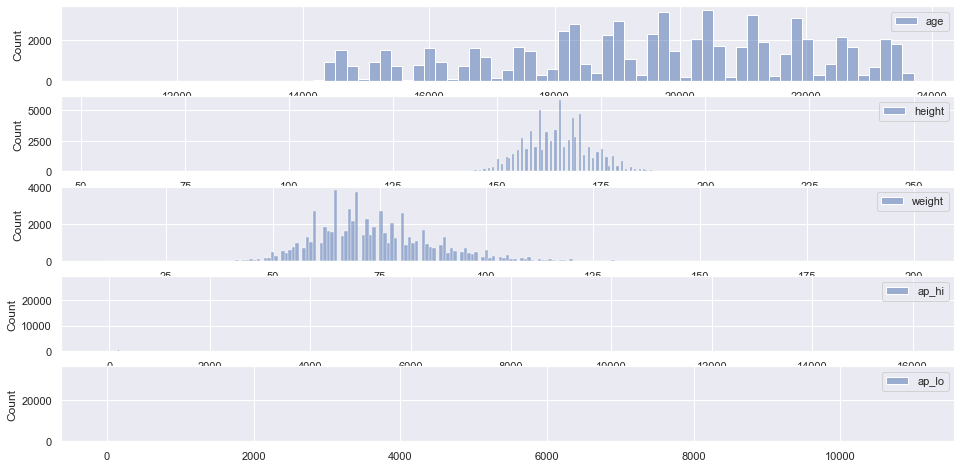

In [5]:
f, axes = plt.subplots(5, 1, figsize=(16, 8))

sb.histplot(data = cardio_data[["age"]], ax = axes[0])
sb.histplot(data = cardio_data[["height"]], ax = axes[1])
sb.histplot(data = cardio_data[["weight"]], ax = axes[2])
sb.histplot(data = cardio_data[["ap_hi"]], ax = axes[3])
sb.histplot(data = cardio_data[["ap_lo"]], axw = axes[4])

<AxesSubplot:>

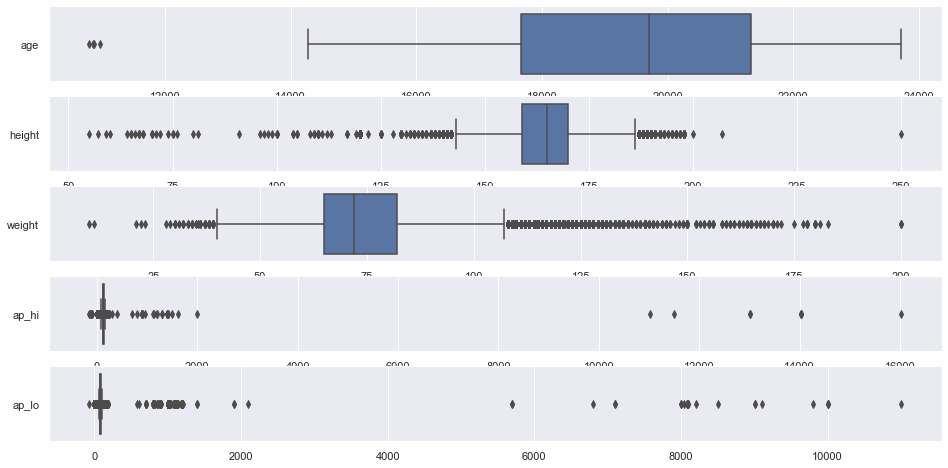

In [8]:
f, axes = plt.subplots(5, 1, figsize=(16, 8))

sb.boxplot(data = cardio_data[["age"]], ax = axes[0], orient = "h")
sb.boxplot(data = cardio_data[["height"]], ax = axes[1], orient = "h")
sb.boxplot(data = cardio_data[["weight"]], ax = axes[2], orient = "h")
sb.boxplot(data = cardio_data[["ap_hi"]], ax = axes[3], orient = "h")
sb.boxplot(data = cardio_data[["ap_lo"]], ax = axes[4], orient = "h")